In [1]:
import SimpleITK as sitk
import os

In [2]:
def compare_meta(ct, sct, name=""):
    print(f"=== {name} ===")
    print("CT size       :", ct.GetSize())
    print("sCT size      :", sct.GetSize())
    print("CT spacing    :", ct.GetSpacing())
    print("sCT spacing   :", sct.GetSpacing())
    print("CT origin     :", ct.GetOrigin())
    print("sCT origin    :", sct.GetOrigin())
    print("CT direction  :", ct.GetDirection())
    print("sCT direction :", sct.GetDirection())
    print()

ab_ct = sitk.ReadImage("synthRAD2025_TEST/Task2/AB/2ABA002/ct.mha")
hn_ct = sitk.ReadImage("synthRAD2025_TEST/Task2/HN/2HNA002/ct.mha")
th_ct = sitk.ReadImage("synthRAD2025_TEST/Task2/TH/2THA005/ct.mha")


ab_sct = sitk.ReadImage("/mnt/d/synthrad/Test/0/0_2ABA002.mha")
hn_sct = sitk.ReadImage("/mnt/d/synthrad/Test/0/0_2HNA002.mha")
th_sct = sitk.ReadImage("/mnt/d/synthrad/Test/0/0_2THA005.mha")

compare_meta(ab_ct, ab_sct, "AB")
compare_meta(hn_ct, hn_sct, "HN")
compare_meta(th_ct, th_sct, "TH")


=== AB ===
CT size       : (310, 309, 88)
sCT size      : (310, 309, 88)
CT spacing    : (1.0, 1.0, 3.0)
sCT spacing   : (1.0, 1.0, 1.0)
CT origin     : (-105.0, -114.19999694824219, -213.0)
sCT origin    : (0.0, 0.0, 0.0)
CT direction  : (1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)
sCT direction : (-1.0, 0.0, 0.0, 0.0, -1.0, 0.0, 0.0, 0.0, 1.0)

=== HN ===
CT size       : (309, 307, 88)
sCT size      : (309, 307, 88)
CT spacing    : (1.0, 1.0, 3.0)
sCT spacing   : (1.0, 1.0, 1.0)
CT origin     : (-110.0, -102.20001220703125, -84.0)
sCT origin    : (0.0, 0.0, 0.0)
CT direction  : (1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)
sCT direction : (-1.0, 0.0, 0.0, 0.0, -1.0, 0.0, 0.0, 0.0, 1.0)

=== TH ===
CT size       : (310, 311, 81)
sCT size      : (310, 311, 81)
CT spacing    : (1.0, 1.0, 3.0)
sCT spacing   : (1.0, 1.0, 1.0)
CT origin     : (-169.0, -96.5, -30.0)
sCT origin    : (0.0, 0.0, 0.0)
CT direction  : (1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)
sCT direction : (-1.0, 0.0, 0.0

In [3]:
import SimpleITK as sitk
import numpy as np

def check_clipping(img, name, clip_range=(-1000, 2000)):
    arr = sitk.GetArrayFromImage(img).astype(np.float32)
    arr_clipped = np.clip(arr, clip_range[0], clip_range[1])

    print(f"=== {name} ===")
    print(f"원본 값 범위   : [{arr.min():.2f}, {arr.max():.2f}]")
    print(f"클리핑 값 범위 : [{arr_clipped.min():.2f}, {arr_clipped.max():.2f}]")

    num_outside = np.sum((arr < clip_range[0]) | (arr > clip_range[1]))
    print(f"클리핑 범위 밖 픽셀 개수: {num_outside}")
    print()

    return arr_clipped

# 쌍 모아두기
pairs = {
    "AB_CT": ab_ct,
    "AB_sCT": ab_sct,
    "HN_CT": hn_ct,
    "HN_sCT": hn_sct,
    "TH_CT": th_ct,
    "TH_sCT": th_sct,
}

# 루프 실행
clipped_arrays = {}
for name, img in pairs.items():
    clipped_arrays[name] = check_clipping(img, name, clip_range=(-1000, 2000))

=== AB_CT ===
원본 값 범위   : [-1024.00, 1285.00]
클리핑 값 범위 : [-1000.00, 1285.00]
클리핑 범위 밖 픽셀 개수: 76768

=== AB_sCT ===
원본 값 범위   : [-0.00, 0.90]
클리핑 값 범위 : [-0.00, 0.90]
클리핑 범위 밖 픽셀 개수: 0

=== HN_CT ===
원본 값 범위   : [-1024.00, 3071.00]
클리핑 값 범위 : [-1000.00, 2000.00]
클리핑 범위 밖 픽셀 개수: 2511034

=== HN_sCT ===
원본 값 범위   : [-0.02, 1.00]
클리핑 값 범위 : [-0.02, 1.00]
클리핑 범위 밖 픽셀 개수: 0

=== TH_CT ===
원본 값 범위   : [-1009.00, 1241.00]
클리핑 값 범위 : [-1000.00, 1241.00]
클리핑 범위 밖 픽셀 개수: 3166

=== TH_sCT ===
원본 값 범위   : [-0.02, 0.99]
클리핑 값 범위 : [-0.02, 0.99]
클리핑 범위 밖 픽셀 개수: 0



=== AB ===


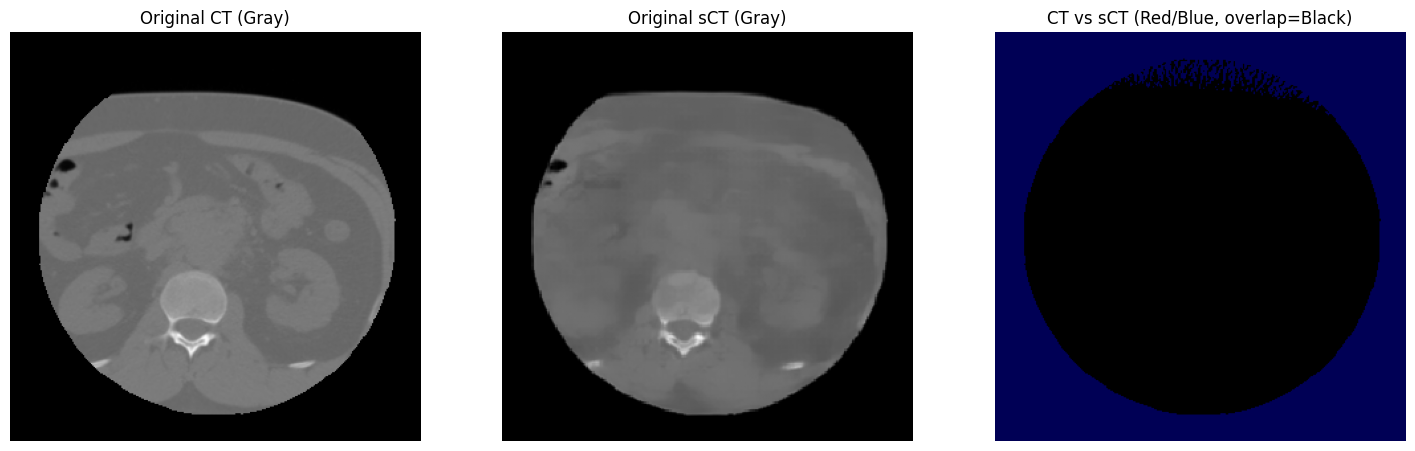

=== HN ===


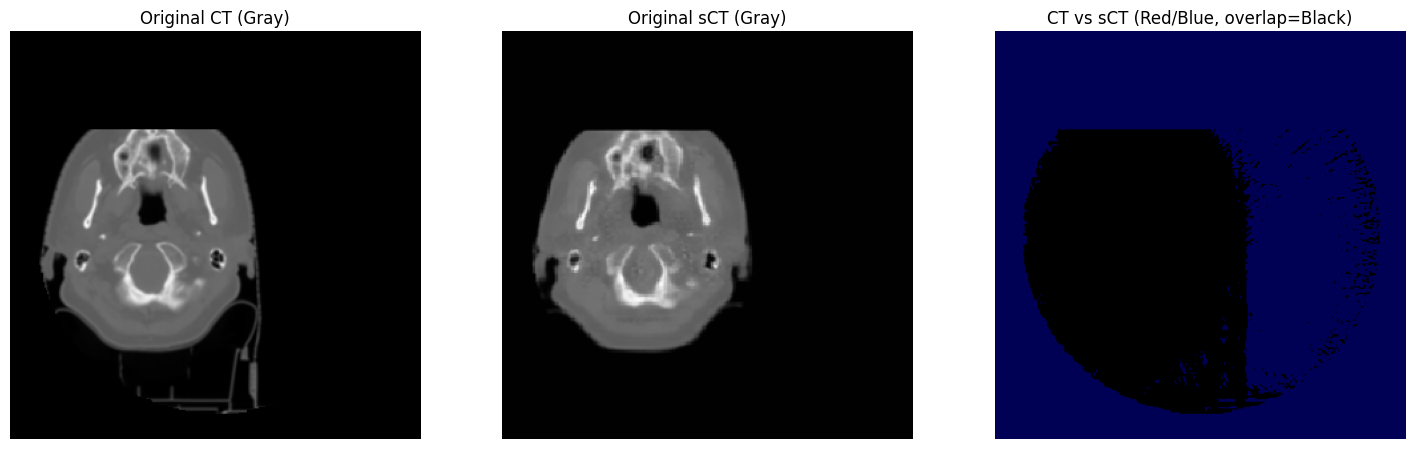

=== TH ===


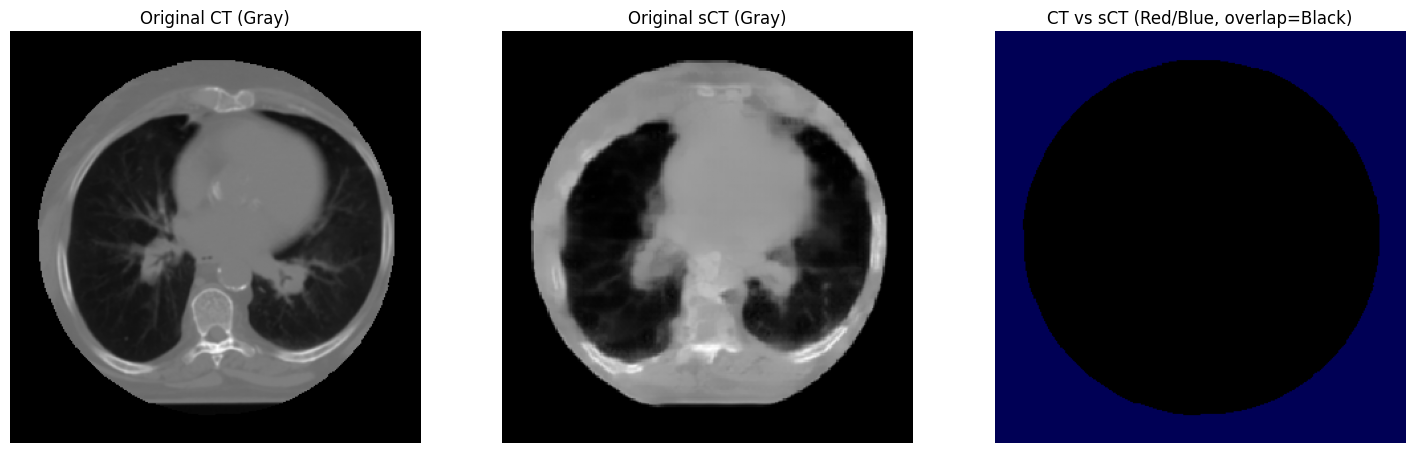

In [4]:
import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt

def check_clipping(img, name, clip_range=(-1000, 2000)):
    arr = sitk.GetArrayFromImage(img).astype(np.float32)
    arr_clipped = np.clip(arr, clip_range[0], clip_range[1])

    print(f"=== {name} ===")
    print(f"원본 값 범위   : [{arr.min():.2f}, {arr.max():.2f}]")
    print(f"클리핑 값 범위 : [{arr_clipped.min():.2f}, {arr_clipped.max():.2f}]")

    num_outside = np.sum((arr < clip_range[0]) | (arr > clip_range[1]))
    print(f"클리핑 범위 밖 픽셀 개수: {num_outside}")
    print()

    return arr_clipped

def show_middle_slice_with_original(ct_img, sct_img, clip_range=(-1000, 2000)):
    # NumPy 배열 변환 후 클리핑
    ct_arr = np.clip(sitk.GetArrayFromImage(ct_img), clip_range[0], clip_range[1])
    sct_arr = np.clip(sitk.GetArrayFromImage(sct_img), clip_range[0], clip_range[1])
    
    # 중간 슬라이스 선택
    mid_idx = ct_arr.shape[0] // 2
    ct_slice = ct_arr[mid_idx]
    sct_slice = sct_arr[mid_idx]
    
    # 원본 그레이스케일 이미지 정규화 (0~1)
    ct_gray = (ct_slice - clip_range[0]) / (clip_range[1] - clip_range[0])
    sct_gray = (sct_slice - clip_range[0]) / (clip_range[1] - clip_range[0])
    
    # 배경 처리: clip_range 이하 값 → 0
    ct_slice[ct_slice <= clip_range[0]] = clip_range[0]
    sct_slice[sct_slice <= clip_range[0]] = clip_range[0]
    
    # 0~1 정규화
    ct_norm = (ct_slice - clip_range[0]) / (clip_range[1] - clip_range[0])
    sct_norm = (sct_slice - clip_range[0]) / (clip_range[1] - clip_range[0])
    
    # 겹치는 부분 → 검은색
    overlap_mask = (ct_norm > 0) & (sct_norm > 0)
    ct_norm[overlap_mask] = 0
    sct_norm[overlap_mask] = 0
    
    # RGB 이미지 생성: R = CT, B = sCT
    rgb_img = np.zeros((*ct_slice.shape, 3), dtype=np.float32)
    rgb_img[..., 0] = ct_norm   # Red
    rgb_img[..., 2] = sct_norm  # Blue
    
    # 시각화
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    axes[0].imshow(ct_gray, cmap='gray')
    axes[0].axis('off')
    axes[0].set_title("Original CT (Gray)")
    
    axes[1].imshow(sct_gray, cmap='gray')
    axes[1].axis('off')
    axes[1].set_title("Original sCT (Gray)")
    
    axes[2].imshow(rgb_img)
    axes[2].axis('off')
    axes[2].set_title("CT vs sCT (Red/Blue, overlap=Black)")
    
    plt.show()

# 예시: 쌍 이미지
pairs = {
    "AB": (ab_ct, ab_sct),
    "HN": (hn_ct, hn_sct),
    "TH": (th_ct, th_sct),
}

# 중간 슬라이스 시각화
for name, (ct_img, sct_img) in pairs.items():
    print(f"=== {name} ===")
    show_middle_slice_with_original(ct_img, sct_img)



In [9]:
import SimpleITK as sitk
import numpy as np
from pathlib import Path

def resample_to_reference(moving_img: sitk.Image, reference_img: sitk.Image, 
                          interpolator=sitk.sitkLinear) -> sitk.Image:
    """
    moving_img (sCT)을 reference_img (CT)와 동일한 spacing, origin, direction, size로 resample
    """
    resampler = sitk.ResampleImageFilter()
    resampler.SetReferenceImage(reference_img)
    resampler.SetInterpolator(interpolator)
    resampled_img = resampler.Execute(moving_img)
    return resampled_img

# CT, sCT 쌍
pairs = {
    "AB": (ab_ct, ab_sct),
    "HN": (hn_ct, hn_sct),
    "TH": (th_ct, th_sct)
}

output_folder = Path("/mnt/c/Users/Administrator/Desktop/synthrad2025-vardifformer/evaluation/ground_truth/sCT_resampled")
output_folder.mkdir(parents=True, exist_ok=True)

for name, (ct_img, sct_img) in pairs.items():
    # sCT를 CT에 맞춰 resample
    sct_resampled = resample_to_reference(sct_img, ct_img, interpolator=sitk.sitkLinear)
    
    # 필요 시 HU 클리핑 (-1000~2000)
    sct_arr = np.clip(sitk.GetArrayFromImage(sct_resampled), -1024, 3071.)
    
    # 다시 SimpleITK 이미지로 변환
    sct_resampled_clipped = sitk.GetImageFromArray(sct_arr)
    sct_resampled_clipped.CopyInformation(ct_img)  # origin, spacing, direction 유지
    
    # 저장
    output_path = output_folder / f"{name}.mha"
    sitk.WriteImage(sct_resampled_clipped, str(output_path))
    print(f"Saved resampled sCT: {output_path}")
    compare_meta(ct_img, sct_resampled_clipped, "_")


Saved resampled sCT: /mnt/c/Users/Administrator/Desktop/synthrad2025-vardifformer/evaluation/ground_truth/sCT_resampled/AB.mha
=== _ ===
CT size       : (310, 309, 88)
sCT size      : (310, 309, 88)
CT spacing    : (1.0, 1.0, 3.0)
sCT spacing   : (1.0, 1.0, 3.0)
CT origin     : (-105.0, -114.19999694824219, -213.0)
sCT origin    : (-105.0, -114.19999694824219, -213.0)
CT direction  : (1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)
sCT direction : (1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)

Saved resampled sCT: /mnt/c/Users/Administrator/Desktop/synthrad2025-vardifformer/evaluation/ground_truth/sCT_resampled/HN.mha
=== _ ===
CT size       : (309, 307, 88)
sCT size      : (309, 307, 88)
CT spacing    : (1.0, 1.0, 3.0)
sCT spacing   : (1.0, 1.0, 3.0)
CT origin     : (-110.0, -102.20001220703125, -84.0)
sCT origin    : (-110.0, -102.20001220703125, -84.0)
CT direction  : (1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)
sCT direction : (1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)

Saved resa

In [25]:
import SimpleITK as sitk
from pathlib import Path

# 변환할 NIfTI 파일
nifti_file = Path("/mnt/c/Users/Administrator/Desktop/synthrad2025-vardifformer/evaluation/ground_truth/segmentation/2THA005.nii.gz")

# 저장할 MHA 파일 경로
mha_file = nifti_file.with_suffix(".mha")  # 같은 이름으로 확장자만 .mha

# NIfTI 로드
img = sitk.ReadImage(str(nifti_file))

# MHA 저장
sitk.WriteImage(img, str(mha_file))

print(f"Converted {nifti_file} → {mha_file}")


RuntimeError: Exception thrown in SimpleITK ImageFileReader_Execute: /tmp/SimpleITK/Code/IO/src/sitkImageReaderBase.cxx:91:
sitk::ERROR: The file "/mnt/c/Users/Administrator/Desktop/synthrad2025-vardifformer/evaluation/ground_truth/segmentation/2THA005.nii.gz" does not exist.

In [26]:
import SimpleITK as sitk

# 기준 이미지를 첫 번째 CT로 설정
ref_img = ab_ct  # 예시
ref_shape = sitk.GetArrayFromImage(ref_img).shape
ref_spacing = ref_img.GetSpacing()

def resample_to_ref(img, ref_img):
    resampler = sitk.ResampleImageFilter()
    resampler.SetReferenceImage(ref_img)
    resampler.SetInterpolator(sitk.sitkLinear)
    resampled = resampler.Execute(img)
    return sitk.GetArrayFromImage(resampled).astype(np.float32)

all_ct_resampled = []

for name, img in pairs.items():
    if "_CT" in name:
        arr = resample_to_ref(img, ref_img)
        # HU 범위 클리핑
        arr = np.clip(arr, -1000, 2000)
        all_ct_resampled.append(arr)

# 4D 배열로 합치기 (N, D, H, W)
all_ct_4d = np.stack(all_ct_resampled, axis=0)
print(f"All CT 4D shape: {all_ct_4d.shape}")


ValueError: need at least one array to stack

In [32]:
import SimpleITK as sitk
import numpy as np

# 파일 읽기
img = sitk.ReadImage("/mnt/c/Users/Administrator/Desktop/synthrad2025-vardifformer/synthRAD2025_Train_2.5D/Task2/AB/2ABA002/ct.mha")
# img = sitk.ReadImage("/mnt/c/Users/Administrator/Desktop/synthrad2025-vardifformer/evaluation/input/2THA005.mha")

# numpy array 로 변환 (z, y, x)
arr = sitk.GetArrayFromImage(img)

# 유니크 값 찾기
unique_vals = np.unique(arr)

print("Unique values:", unique_vals)
print("개수:", len(unique_vals))


Unique values: [-1024. -1022. -1021. ...  1238.  1248.  1285.]
개수: 1992


In [19]:
import os
import SimpleITK as sitk
import pandas as pd

base_dir = "synthRAD2025_Train_2.5D/Task2"

records = []

for root, dirs, files in os.walk(base_dir):
    if "ct.mha" in files:
        ct_path = os.path.join(root, "ct.mha")
        try:
            img = sitk.ReadImage(ct_path)
            arr = sitk.GetArrayFromImage(img)
            size_x, size_y, size_z = img.GetSize()
            record = {
                "path": ct_path,
                "shape_z_y_x": arr.shape,       # numpy 기준
                "spacing_x_y_z": img.GetSpacing(),
                "size_x": size_x,
                "size_y": size_y,
                "size_z": size_z
            }
            records.append(record)
        except Exception as e:
            print(f"Error reading {ct_path}: {e}")

# DataFrame 생성
df = pd.DataFrame(records)

# 확인
print(df.head())

# 필요하면 CSV로 저장
df.to_csv("ct_shapes.csv", index=False)


                                              path    shape_z_y_x  \
0  synthRAD2025_Train_2.5D/Task2/AB/2ABA002/ct.mha  (5, 309, 310)   
1  synthRAD2025_Train_2.5D/Task2/AB/2ABA005/ct.mha  (5, 309, 289)   
2  synthRAD2025_Train_2.5D/Task2/AB/2ABA006/ct.mha  (5, 310, 312)   
3  synthRAD2025_Train_2.5D/Task2/AB/2ABA008/ct.mha  (5, 308, 315)   
4  synthRAD2025_Train_2.5D/Task2/AB/2ABA009/ct.mha  (5, 313, 311)   

     spacing_x_y_z  size_x  size_y  size_z  
0  (1.0, 1.0, 1.0)     310     309       5  
1  (1.0, 1.0, 1.0)     289     309       5  
2  (1.0, 1.0, 1.0)     312     310       5  
3  (1.0, 1.0, 1.0)     315     308       5  
4  (1.0, 1.0, 1.0)     311     313       5  


In [24]:
df.describe()

,size_x,size_y,size_z
count,955.000000,955.000000,955.0
mean,385.591623,383.433508,5.0
std,82.975917,80.337434,0.0
min,265.000000,225.000000,5.0
25%,309.000000,309.000000,5.0
50%,316.000000,316.000000,5.0
75%,454.000000,452.500000,5.0
max,560.000000,560.000000,5.0


Sample image size: (310, 309, 5)
생성된 패치 개수: 16


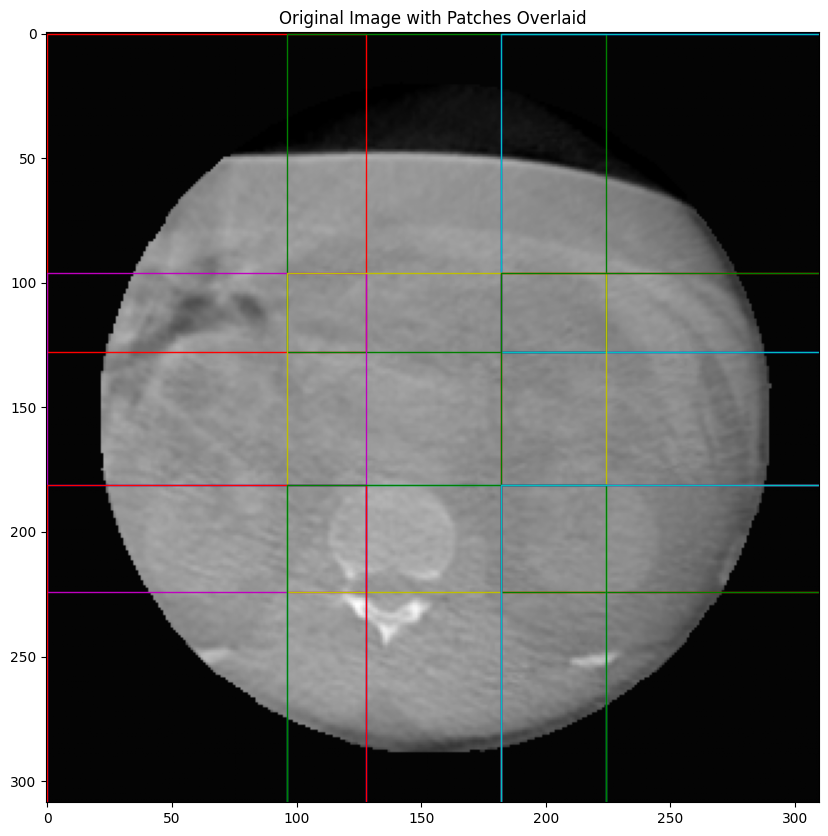

In [50]:
%matplotlib inline

import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt
from typing import List, Tuple
from matplotlib.patches import Rectangle


def create_sliding_window_patches(input_image: sitk.Image, 
                                  patch_size: Tuple[int, int, int] = (128, 128, 0),
                                  overlap: float = 0) -> Tuple[List[sitk.Image], List[Tuple[int, int]]]:
    """
    SimpleITK 이미지를 슬라이딩 윈도우 방식으로 패치로 자르는 함수.
    패치와 함께 각 패치의 시작 위치(좌표)를 반환합니다.

    Args:
        input_image: 원본 SimpleITK 이미지 (H x W x D).
        patch_size: 잘라낼 패치의 크기 (width, height, depth). depth가 0이면 원본 깊이를 유지합니다.
        overlap: 패치 간 겹치는 비율 (0.0에서 1.0 사이).

    Returns:
        1. 잘라낸 SimpleITK 패치 이미지들의 리스트.
        2. 각 패치의 시작 위치(x, y) 좌표 리스트.
    """
    original_size = input_image.GetSize()
    original_width, original_height, original_depth = original_size[0], original_size[1], original_size[2]

    target_width, target_height = patch_size[0], patch_size[1]
    target_depth = original_depth if patch_size[2] == 0 else patch_size[2]
    
    stride_x = int(target_width * (1.0 - overlap))
    stride_y = int(target_height * (1.0 - overlap))
    if stride_x == 0: stride_x = 1
    if stride_y == 0: stride_y = 1
    
    patches = []
    patch_origins = []

    for y in range(0, original_height, stride_y):
        for x in range(0, original_width, stride_x):
            start_x = x
            start_y = y
            
            if start_x + target_width > original_width:
                start_x = original_width - target_width
            if start_y + target_height > original_height:
                start_y = original_height - target_height
            
            crop_size = (target_width, target_height, target_depth)
            start_index = (start_x, start_y, 0)

            if original_width < target_width or original_height < target_height:
                 continue
            
            cropper = sitk.ExtractImageFilter()
            cropper.SetSize(crop_size)
            cropper.SetIndex(start_index)
            
            patch = cropper.Execute(input_image)
            patches.append(patch)
            patch_origins.append((start_x, start_y)) # 패치 시작 위치 저장
            
            # 여기서 break 문을 제거했습니다.
            
    return patches, patch_origins


def visualize_patches_on_original(original_image: sitk.Image, patch_origins: List[Tuple[int, int]], patch_size: Tuple[int, int]):
    """
    원본 이미지 위에 패치 경계를 서로 다른 색으로 시각화하는 함수.
    """
    original_array = sitk.GetArrayViewFromImage(original_image)
    mid_slice = original_array[original_array.shape[0] // 2, :, :]
    
    plt.figure(figsize=(10, 10))
    plt.title("Original Image with Patches Overlaid")
    
    plt.imshow(mid_slice, cmap='gray')
    
    colors = ['r', 'g', 'b', 'c', 'm', 'y']
    
    for i, origin in enumerate(patch_origins):
        color = colors[i % len(colors)]
        
        x_start, y_start = origin[0], origin[1]
        width, height = patch_size[0], patch_size[1]
        
        rect = Rectangle((x_start, y_start), width, height,
                         linewidth=1, edgecolor=color, facecolor='none')
        plt.gca().add_patch(rect)
    
    plt.show()

# --- 실행 예시 ---
# 1. 테스트용 가상 이미지 생성 (크기: 256x256x10)
sample_image = sitk.ReadImage("/mnt/c/Users/Administrator/Desktop/synthrad2025-vardifformer/synthRAD2025_Train_2.5D/Task2/AB/2ABA002/cbct.mha")
print(f"Sample image size: {sample_image.GetSize()}")

# 2. 슬라이딩 윈도우 패치 추출 (패치와 시작 위치 반환)
patches, patch_origins = create_sliding_window_patches(sample_image, patch_size=(128, 128, 0), overlap=0.25)

# 3. 원본 이미지 위에 패치 위치 시각화
print(f"생성된 패치 개수: {len(patches)}")
visualize_patches_on_original(sample_image, patch_origins, patch_size=(128, 128))

In [51]:
import os
import shutil
import random

# 기본 경로 설정
base_train_dir = 'synthRAD2025_Train_2.5D/Task2'
base_val_dir = 'VAL/Task2'

# 이동할 비율 (20%)
split_ratio = 0.2

# Task 폴더 리스트
tasks = ['AB', 'HN', 'TH']

print("데이터 분할을 시작합니다...")

# 각 Task 폴더에 대해 반복
for task in tasks:
    train_task_dir = os.path.join(base_train_dir, task)
    val_task_dir = os.path.join(base_val_dir, task)

    # VAL 폴더가 없으면 생성
    os.makedirs(val_task_dir, exist_ok=True)
    
    print(f"\n--- {task} 폴더 처리 중 ---")
    
    # 해당 Task 폴더 내의 모든 환자 케이스 (폴더) 목록 가져오기
    all_cases = [d for d in os.listdir(train_task_dir) if os.path.isdir(os.path.join(train_task_dir, d))]
    
    # 환자 케이스 개수 계산
    num_cases = len(all_cases)
    num_val_cases = int(num_cases * split_ratio)
    
    print(f"총 케이스 수: {num_cases}")
    print(f"검증(VAL) 데이터로 이동할 케이스 수 (약 20%): {num_val_cases}")

    if num_val_cases == 0 and num_cases > 0:
        num_val_cases = 1
        print("최소 1개의 케이스를 검증 데이터로 이동합니다.")

    # 전체 케이스에서 무작위로 검증 케이스 선택
    val_cases = random.sample(all_cases, num_val_cases)
    
    # 선택된 케이스를 TRAIN에서 VAL로 이동
    for case_name in val_cases:
        src_path = os.path.join(train_task_dir, case_name)
        dst_path = os.path.join(val_task_dir, case_name)
        
        print(f"  - '{case_name}' 이동 중...")
        shutil.move(src_path, dst_path)
        
print("\n모든 데이터 분할이 완료되었습니다.")
print("기존 폴더에는 80%, VAL/Task2 폴더에는 20%의 데이터가 저장되었습니다.")

데이터 분할을 시작합니다...

--- AB 폴더 처리 중 ---
총 케이스 수: 310
검증(VAL) 데이터로 이동할 케이스 수 (약 20%): 62
  - '2ABB115' 이동 중...
  - '2ABA037' 이동 중...
  - '2ABC011' 이동 중...
  - '2ABB091' 이동 중...
  - '2ABE158' 이동 중...
  - '2ABC019' 이동 중...
  - '2ABC199' 이동 중...
  - '2ABB054' 이동 중...
  - '2ABB119' 이동 중...
  - '2ABB085' 이동 중...
  - '2ABA046' 이동 중...
  - '2ABB047' 이동 중...
  - '2ABA086' 이동 중...
  - '2ABE131' 이동 중...
  - '2ABC097' 이동 중...
  - '2ABA033' 이동 중...
  - '2ABA122' 이동 중...
  - '2ABB092' 이동 중...
  - '2ABC036' 이동 중...
  - '2ABD041' 이동 중...
  - '2ABE175' 이동 중...
  - '2ABD058' 이동 중...
  - '2ABA132' 이동 중...
  - '2ABB006' 이동 중...
  - '2ABB005' 이동 중...
  - '2ABD060' 이동 중...
  - '2ABE010' 이동 중...
  - '2ABD029' 이동 중...
  - '2ABE209' 이동 중...
  - '2ABB021' 이동 중...
  - '2ABB025' 이동 중...
  - '2ABC080' 이동 중...
  - '2ABA138' 이동 중...
  - '2ABB043' 이동 중...
  - '2ABB114' 이동 중...
  - '2ABE052' 이동 중...
  - '2ABE201' 이동 중...
  - '2ABE151' 이동 중...
  - '2ABD049' 이동 중...
  - '2ABA002' 이동 중...
  - '2ABE200' 이동 중...
  - '2ABA109'

In [ ]:
import os
import glob
import SimpleITK as sitk
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
from typing import List, Tuple

# MONAI 관련 모듈 임포트
from monai.transforms import Compose, Resize, ScaleIntensityRanged, ToTensorD

# SlidingWindowPatchDataset 클래스 수정
class SlidingWindowPatchDataset(Dataset):
    def __init__(self, root_dir: str, modality: str, patch_size: Tuple[int, int, int] = (128, 128, 0), overlap: float = 0.5, transform=None):
        """
        Args:
            root_dir: 데이터셋의 루트 경로.
            modality: 'ct' 또는 'cbct' 중 학습에 사용할 modality.
            patch_size: (width, height, depth) 형태의 패치 크기.
            overlap: 패치 간 겹치는 비율.
            transform: MONAI Compose 객체.
        """
        self.root_dir = root_dir
        self.modality = modality.lower()
        self.patch_size = patch_size
        self.overlap = overlap
        self.transform = transform # transform 인자 추가
        
        if self.modality not in ['ct', 'cbct']:
            raise ValueError("modality는 'ct' 또는 'cbct'여야 합니다.")
        
        self.file_list = []
        self._pre_calculate_patches()

    def _pre_calculate_patches(self):
        tasks = ['AB', 'HN', 'TH']
        for task in tasks:
            task_dir = os.path.join(self.root_dir, task)
            case_dirs = [d for d in os.listdir(task_dir) if os.path.isdir(os.path.join(task_dir, d))]
            
            for case_name in case_dirs:
                case_dir = os.path.join(task_dir, case_name)
                input_path = os.path.join(case_dir, f'{self.modality}.mha')
                mask_path = os.path.join(case_dir, 'mask.mha')
                
                if not (os.path.exists(input_path) and os.path.exists(mask_path)):
                    print(f"경고: {case_dir}에서 파일이 누락되었습니다. 이 케이스는 건너뜁니다.")
                    continue
                
                input_image = sitk.ReadImage(input_path)
                original_size = input_image.GetSize()
                original_width, original_height, original_depth = original_size[0], original_size[1], original_size[2]
                
                target_width, target_height = self.patch_size[0], self.patch_size[1]
                stride_x = int(target_width * (1.0 - self.overlap))
                stride_y = int(target_height * (1.0 - self.overlap))
                if stride_x == 0: stride_x = 1
                if stride_y == 0: stride_y = 1
                
                for y in range(0, original_height, stride_y):
                    for x in range(0, original_width, stride_x):
                        start_x = x
                        start_y = y
                        
                        if start_x + target_width > original_width:
                            start_x = original_width - target_width
                        if start_y + target_height > original_height:
                            start_y = original_height - target_height
                        
                        self.file_list.append({
                            'input': input_path,
                            'mask': mask_path,
                            'origin': (start_x, start_y, 0),
                            'size': (target_width, target_height, original_depth)
                        })

    def __len__(self):
        return len(self.file_list)

    def __getitem__(self, idx):
        patch_info = self.file_list[idx]
        
        # SimpleITK 이미지 로드
        input_image = sitk.ReadImage(patch_info['input'])
        mask_image = sitk.ReadImage(patch_info['mask'])
        
        # 패치 추출
        cropper = sitk.ExtractImageFilter()
        cropper.SetIndex(patch_info['origin'])
        cropper.SetSize(patch_info['size'])
        
        input_patch = cropper.Execute(input_image)
        mask_patch = cropper.Execute(mask_image)
        
        # SimpleITK 이미지를 NumPy 배열로 변환
        input_array = sitk.GetArrayFromImage(input_patch)
        mask_array = sitk.GetArrayFromImage(mask_patch)
        
        # MONAI Transforms 적용을 위해 딕셔너리 형태로 묶음
        data = {
            'input': input_array,
            'mask': mask_array
        }

        # self.transform이 있다면 적용
        if self.transform:
            data = self.transform(data)

        return data

# --- 사용 예시 ---
if __name__ == "__main__":
    transforms = Compose(
        [
            # HU 값 범위를 정규화 (-1000 ~ 1000)
            ScaleIntensityRanged(keys=['input'], a_min=-1024, a_max=3071., b_min=0.0, b_max=1.0, clip=True),
            ToTensorD(keys=['input', 'mask'])
        ]
    )

    # 2. Dataset과 DataLoader 인스턴스 생성
    root_dir = 'synthRAD2025_Train_2.5D/Task2' 
    ct_dataset = SlidingWindowPatchDataset(
        root_dir=root_dir,
        modality='ct',
        patch_size=(128, 128, 0),
        overlap=0.5,
        transform=transforms # 정의한 변환 파이프라인을 전달
    )
    ct_data_loader = DataLoader(ct_dataset, batch_size=4, shuffle=True, num_workers=4)
    
    # 3. 데이터 로딩 확인
    print(f"총 패치 개수: {len(ct_dataset)}")
    first_batch = next(iter(ct_data_loader))
    print("\nMONAI Transform이 적용된 배치 데이터 형태:")
    print(f"  input: {first_batch['input'].shape}")
    print(f"  mask: {first_batch['mask'].shape}")

경고: synthRAD2025_Train_2.5D/Task2/AB/overviews에서 파일이 누락되었습니다. 이 케이스는 건너뜁니다.
경고: synthRAD2025_Train_2.5D/Task2/TH/overviews에서 파일이 누락되었습니다. 이 케이스는 건너뜁니다.
총 패치 개수: 32772

MONAI Transform이 적용된 배치 데이터 형태:
  input: torch.Size([4, 5, 128, 128])
  mask: torch.Size([4, 5, 128, 128])


In [64]:
from matplotlib.colors import ListedColormap
def visualize_batch_with_overlay(batch, modality_name, num_samples_to_show=4):
    """
    단일 modality와 마스크를 시각화하고, 오버레이된 이미지를 추가하는 함수.
    
    Args:
        batch (dict): DataLoader에서 반환된 텐서 딕셔너리.
        modality_name (str): 'ct' 또는 'cbct'와 같은 modality 이름.
        num_samples_to_show (int): 시각화할 샘플의 개수.
    """
    input_data = batch['input'].detach().cpu().numpy()
    mask_data = batch['mask'].detach().cpu().numpy()
    
    batch_size = input_data.shape[0]
    if num_samples_to_show > batch_size:
        num_samples_to_show = batch_size

    slice_index = input_data.shape[2] // 2
    
    # 서브플롯 열 개수를 3으로 변경
    fig, axes = plt.subplots(num_samples_to_show, 3, figsize=(12, num_samples_to_show * 4))
    fig.suptitle("Batch Data Visualization (Middle Slice)", fontsize=16)

    if num_samples_to_show == 1:
        axes = np.array([axes])

    # 빨간색 커스텀 컬러맵 정의
    red_cmap = ListedColormap(['none', 'red'])

    for i in range(num_samples_to_show):
        input_slice = input_data[i, 0, slice_index, :, :]
        mask_slice = mask_data[i, 0, slice_index, :, :]
        
        # 1. 입력 이미지 시각화
        axes[i, 0].imshow(input_slice, cmap='gray')
        axes[i, 0].set_title(f'Sample {i+1} - {modality_name.upper()}')
        axes[i, 0].axis('off')

        # 2. 마스크를 흑백으로 시각화
        mask_binary = (mask_slice > 0).astype(np.uint8)
        axes[i, 1].imshow(mask_binary, cmap='gray', vmin=0, vmax=1)
        axes[i, 1].set_title(f'Sample {i+1} - Mask')
        axes[i, 1].axis('off')

        # 3. 마스크 오버레이 시각화
        axes[i, 2].imshow(input_slice, cmap='gray')
        # 마스크를 투명한 빨간색으로 오버레이
        axes[i, 2].imshow(mask_binary, cmap=red_cmap, alpha=0.5, vmin=0, vmax=1)
        axes[i, 2].set_title(f'Sample {i+1} - Overlay')
        axes[i, 2].axis('off')
        
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()
visualize_batch_with_overlay(first_batch, modality_name='ct', num_samples_to_show=4)



IndexError: too many indices for array: array is 4-dimensional, but 5 were indexed